<a href="https://colab.research.google.com/github/h-neal/ukpropertyprices/blob/main/Price_Paid_Dataset_(May_2024)_Exploratory_Analysis_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Dataset**

In [ ]:
#Importing the model dataset

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Use pd.read_pickle() to read the pickle file
df_cleaned_housing_data = pd.read_pickle('/content/drive/MyDrive/Housing Prices Project/May 2024/cleaned_housing_data_may_2024.pkl')

Mounted at /content/drive


**2. Overview of the Dataset**

2.1. Checking for Missing Values

In [ ]:
# Checking for Missing Values

missing_values = df_cleaned_housing_data.isnull().sum()
print(missing_values)

Transaction Unique ID                         0
Price                                         0
Date of Transfer                              0
Post Code                                     0
Property Type                                 0
New Build? (Y/N)                              0
Duration                                      0
Primary Addressable Object Name (PAON)        0
Secondary Addressable Object Name (SAON)    885
Town/City                                     0
District                                      0
County                                        0
Price_Segment                                 0
latitude                                      0
longitude                                     0
Post Code Area                                0
Region                                        0
dtype: int64


2.2. Summary Statistics

In [ ]:
# Getting summary statistics for numerical column labelled "Price"

print(df_cleaned_housing_data['Price'].describe())


count    1.039000e+03
mean     3.720360e+05
std      2.970010e+05
min      5.000000e+04
25%      2.103500e+05
50%      3.090000e+05
75%      4.350000e+05
max      3.700000e+06
Name: Price, dtype: float64


2.3. Data Types

In [ ]:
# Checking for data types and overall structure

df_cleaned_housing_data.dtypes


,0
Transaction Unique ID,object
Price,int64
Date of Transfer,datetime64[ns]
Post Code,object
Property Type,category
New Build? (Y/N),category
Duration,category
Primary Addressable Object Name (PAON),object
Secondary Addressable Object Name (SAON),object
Town/City,object


2.4. Value counts for categorical columns

In [ ]:
# Producing a table for the counts of the values of the columns labelled "Property Type", "New Build? (Y/N)", "Duration" and "Price_Segment".

# Value counts for categorical columns
print(df_cleaned_housing_data['Property Type'].value_counts())

print(df_cleaned_housing_data['New Build? (Y/N)'].value_counts())

print(df_cleaned_housing_data['Duration'].value_counts())

print(df_cleaned_housing_data['Price_Segment'].value_counts())

print(df_cleaned_housing_data['Region'].value_counts())


Property Type
D    325
S    312
T    202
F    200
O      0
Name: count, dtype: int64
New Build? (Y/N)
N    637
Y    402
Name: count, dtype: int64
Duration
F    800
L    239
Name: count, dtype: int64
Price_Segment
Regular     982
High-End     39
Luxury       18
Name: count, dtype: int64
Region
South East         165
North West         152
East Midlands      130
Greater London     117
North East         116
West Midlands      115
East of England    111
South West          91
Wales               42
Channel Islands      0
Scotland             0
Isle of Man          0
Name: count, dtype: int64


In [ ]:
# Producing a table of the entries where the value is "Scotland" in the column labelled "Region"

scotland_entries = df_cleaned_housing_data[df_cleaned_housing_data['Region'] == 'Scotland']
scotland_entries.head()


,Transaction Unique ID,Price,Date of Transfer,Post Code,Property Type,New Build? (Y/N),Duration,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Town/City,District,County,Price_Segment,latitude,longitude,Post Code Area,Region


In [ ]:
# Reassigning the entry with the value "Scotland" for the column labelled "Region" with the value "North East"

df_cleaned_housing_data['Region'] = df_cleaned_housing_data['Region'].replace('Scotland', 'North East')


<ipython-input-7-ed522732f0c7>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned_housing_data['Region'] = df_cleaned_housing_data['Region'].replace('Scotland', 'North East')


In [ ]:
# Removing the Categories value which have a count of zero from the column labelled Region

df_cleaned_housing_data['Region'] = df_cleaned_housing_data['Region'].cat.remove_unused_categories()


In [ ]:
# Removing the Category "O" from the column labelled Property Type

df_cleaned_housing_data['Property Type'] = df_cleaned_housing_data['Property Type'].cat.remove_unused_categories()

In [ ]:
# Value counts for adjusted categorical columns

print(df_cleaned_housing_data['Property Type'].value_counts())

print(df_cleaned_housing_data['Region'].value_counts())

Property Type
D    325
S    312
T    202
F    200
Name: count, dtype: int64
Region
South East         165
North West         152
East Midlands      130
Greater London     117
North East         116
West Midlands      115
East of England    111
South West          91
Wales               42
Name: count, dtype: int64


**3. Univariate Analysis**

3.1. Price

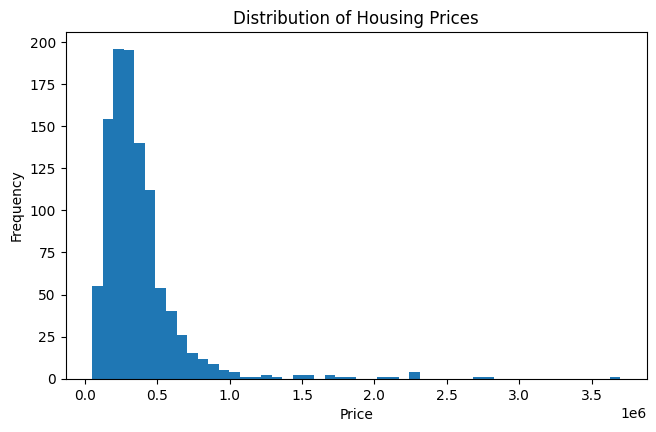

In [ ]:
import matplotlib.pyplot as plt

# Plotting Histogram for the column labelled "Price"

plt.figure(figsize=(7.5, 4.5))
plt.hist(df_cleaned_housing_data['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices')
plt.show()


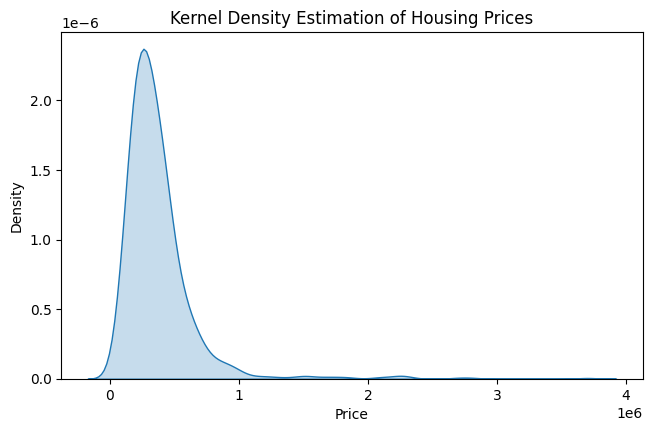

In [ ]:
import seaborn as sns

# Plotting KDE plot for the column labelled "Price"

plt.figure(figsize=(7.5, 4.5))
sns.kdeplot(df_cleaned_housing_data['Price'], fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Housing Prices')
plt.show()


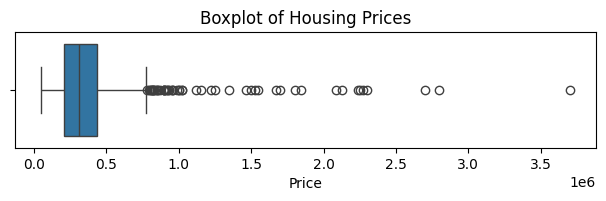

In [ ]:
# Plotting a Boxplot for the column labelled "Price"

plt.figure(figsize=(7.5, 1.5))
sns.boxplot(x=df_cleaned_housing_data['Price'])
plt.xlabel('Price')
plt.title('Boxplot of Housing Prices')
plt.show()


In [ ]:
# Calculating Skewness and Kurtosis

from scipy.stats import skew, kurtosis

print("Skewness of Price:", skew(df_cleaned_housing_data['Price']))
print("Kurtosis of Price:", kurtosis(df_cleaned_housing_data['Price']))


Skewness of Price: 4.572839447017397
Kurtosis of Price: 32.23798822923014


Findings:

1. The Skewness of Price is 4.87, indicating that the distribution of prices is highly skewed to the right. Hence, there are many lower-priced observations, but a few extreme, high-priced observations pulling the distribution to the right. This right skew suggests that there are some very high outliers in the dataset.

2. The Kurtosis of Price is 43.16, indicating that the distribution of prices has very heavy tails, meaning there are many outliers (particularly extreme values far from the mean). Hence, the price distribution has more extreme deviations than a normal distribution.

Overall Conclusion:

The data shows that prices are highly skewed to the right, with a lot of outliers or extreme values. This might suggest that a small number of high-priced items are significantly affecting the distribution, making it non-normal.

3.2. Categorical Columns

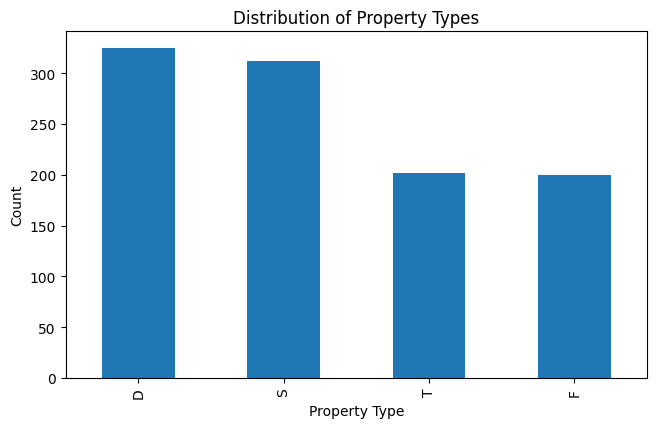

In [ ]:
# Plotting Bar chart for the column labelled "Property Type"

plt.figure(figsize=(7.5, 4.5))
df_cleaned_housing_data['Property Type'].value_counts().plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.show()


Findings:

- "Terraced" and "Semi-Detatched" make up the majority of the transactions, whilst "Flats" are the property type which have the least transactions.

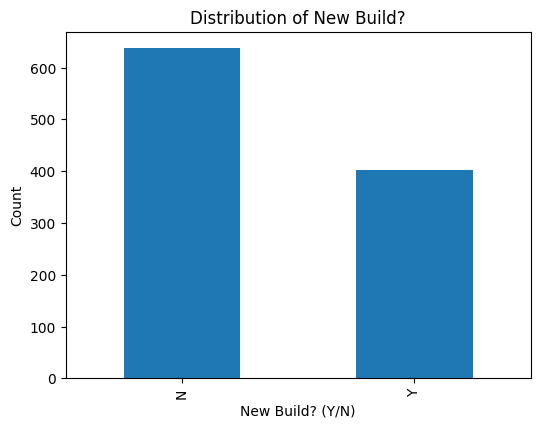

In [ ]:
# Plotting Bar chart for the column labelled "New Build? (Y/N)"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['New Build? (Y/N)'].value_counts().plot(kind='bar')
plt.xlabel('New Build? (Y/N)')
plt.ylabel('Count')
plt.title('Distribution of New Build?')
plt.show()


Findings: The majority of the transactions are not New Build properties.

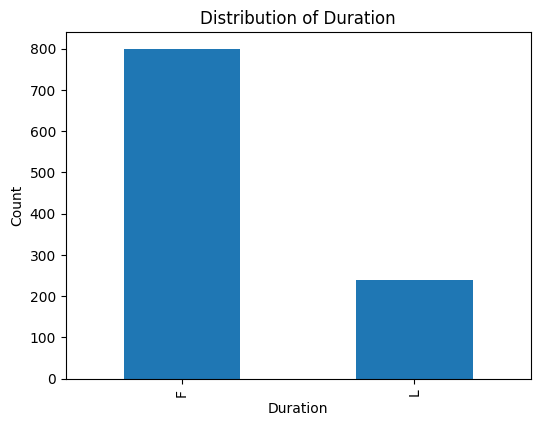

In [ ]:
# Plotting Bar chart for the column labelled "Duration"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['Duration'].value_counts().plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.show()


Findings: The majority of the transactions are "Freehold" properties.

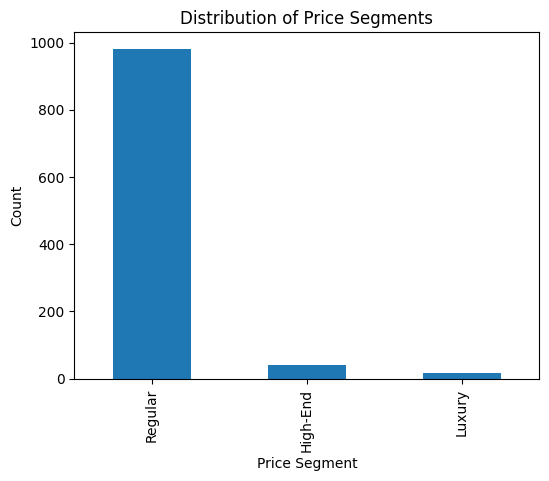

In [ ]:
# Plotting Bar chart for the column labelled "Price_Segment"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['Price_Segment'].value_counts().plot(kind='bar')
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Distribution of Price Segments')
plt.show()


Findings: The majority of the transactions are from the "Regular" Price Segment.

**4. Bivariate Analysis**

4.1. Price vs. Categorical Variables

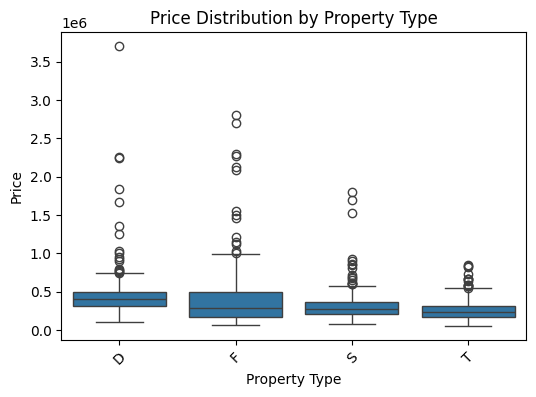

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Property Type"

plt.figure(figsize=(6, 4))
sns.boxplot(x='Property Type', y='Price', data=df_cleaned_housing_data)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.show()


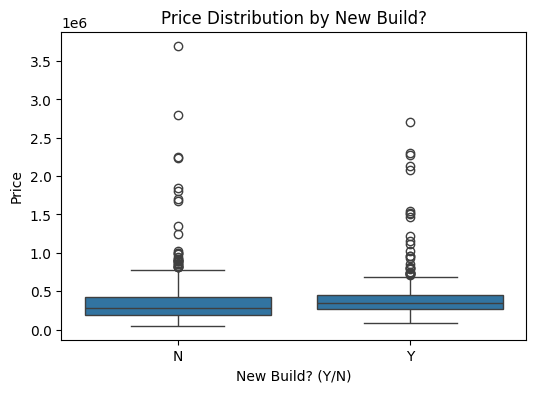

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "New Build? (Y/N)"

plt.figure(figsize=(6, 4))
sns.boxplot(x='New Build? (Y/N)', y='Price', data=df_cleaned_housing_data)
plt.xlabel('New Build? (Y/N)')
plt.ylabel('Price')
plt.title('Price Distribution by New Build?')
plt.show()


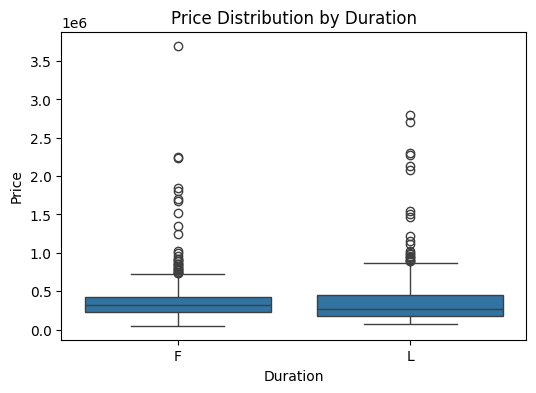

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Duration"

plt.figure(figsize=(6, 4))
sns.boxplot(x='Duration', y='Price', data=df_cleaned_housing_data)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Price Distribution by Duration')
plt.show()


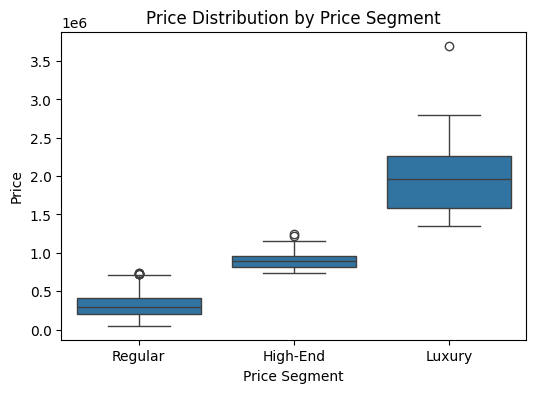

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Price_Segment".

order = ['Regular', 'High-End', 'Luxury']  # Define the order for the x-axis

plt.figure(figsize=(6, 4))
sns.boxplot(x='Price_Segment', y='Price', data=df_cleaned_housing_data, order=order)
plt.xlabel('Price Segment')
plt.ylabel('Price')
plt.title('Price Distribution by Price Segment')
plt.show()


4.2. Price vs. Location

<ipython-input-23-5cc56e43add9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_avg_price = df_cleaned_housing_data.groupby('Region')['Price'].mean().sort_values(ascending=False)


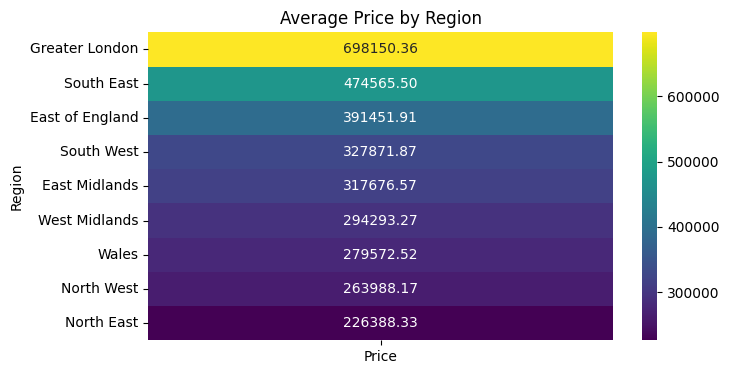

In [ ]:
# Plotting a Heatmap of the column labelled "Price" by the column labelled "Region".

# Calculating the average price for each region
region_avg_price = df_cleaned_housing_data.groupby('Region')['Price'].mean().sort_values(ascending=False)

# Creating a new DataFrame with the average prices
region_avg_price_df = pd.DataFrame(region_avg_price)

# Creating a heatmap
plt.figure(figsize=(7.5, 4))
sns.heatmap(region_avg_price_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Price by Region')
plt.show()


Findings: The mean average price is generally greater in Greater London and in the South of England. The mean average price is generally lesser in the North of England and in Wales.

In [ ]:
# Plotting a geospatial heatmap of the UK using the columns labelled "Price", "longitude" and "latitude".

import folium
from folium.plugins import HeatMap

# Creating a base map centered on the UK
map_uk = folium.Map(location=[54.0, -2.0], zoom_start=5)

# Preparing the data for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_cleaned_housing_data.iterrows()]

# Adding the heatmap to the map
HeatMap(heat_data, radius=15, blur=15).add_to(map_uk)

# Displaying the map
display(map_uk)


4.3. Price Over Time

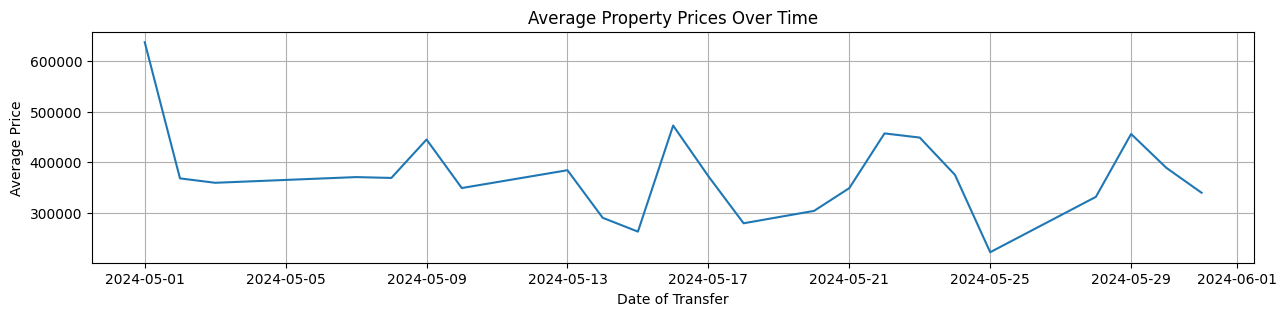

In [ ]:
# Time Series Analysis: Plotting a graph that shows the column labelled "Prices" has changed with column labelled "Date of Transfer"

# Converting the "Date of Transfer" column to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Grouping the data by date and calculate the average price
price_over_time = df_cleaned_housing_data.groupby('Date of Transfer')['Price'].mean()

# Plotting the time series
plt.figure(figsize=(15, 3))
plt.plot(price_over_time.index, price_over_time.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Property Prices Over Time')
plt.grid(True)
plt.show()


Findings: There is no noticeable trends in the change of the mean average property price over time.

**5. Multivariate Analysis**

5.1. Price, Property Type and Location

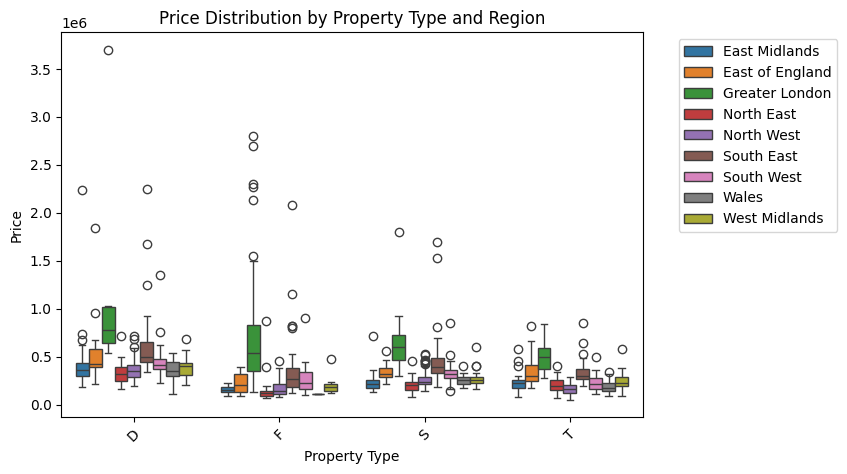

In [ ]:
# Plotting a boxplot for the column labelled "Price" by the columns labelled "Property Type" and "Region".

plt.figure(figsize=(7.5, 5))
sns.boxplot(x='Property Type', y='Price', hue='Region', data=df_cleaned_housing_data)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type and Region')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


5.2. Correlation Matrix

In [ ]:
# Applying One-Hot Encoding to the categorical columns

df_encoded = pd.get_dummies(df_cleaned_housing_data,
                            columns=['Property Type', 'New Build? (Y/N)', 'Duration', 'Region'],
                            drop_first=False)



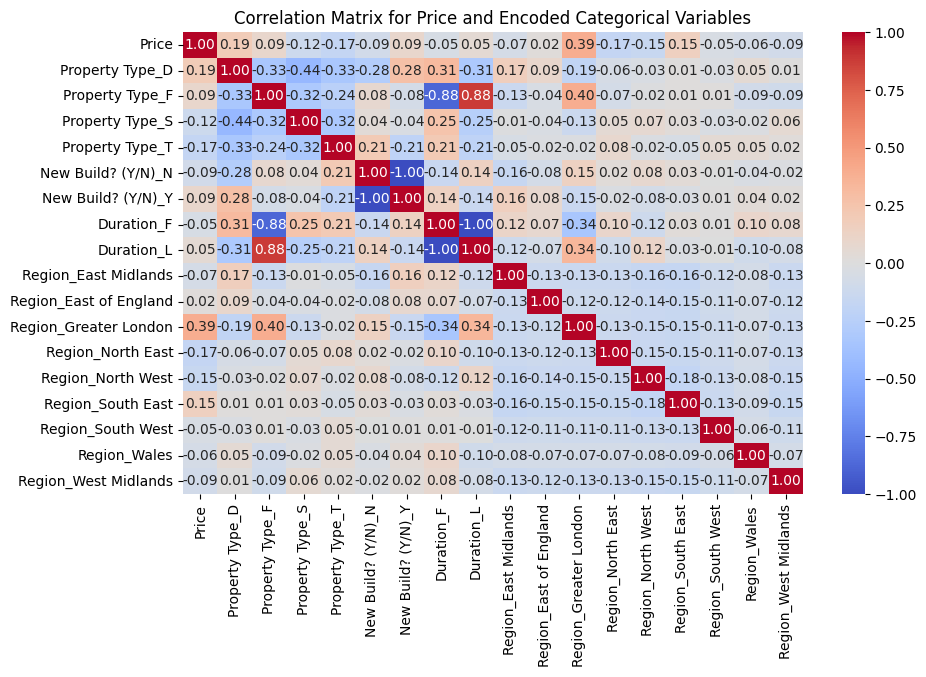

In [ ]:
# Computing the correlation matrix for the encoded DataFrame

corr_matrix = df_encoded[['Price'] +
                         list(df_encoded.columns[df_encoded.columns.str.contains('Property Type')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('New Build?')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('Duration')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('Region')])].corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Price and Encoded Categorical Variables')
plt.show()


Findings:

- There is notable correlation between Price and; Detatched Properties, the Greater London Region.
- There is notbale correlation between Freehold Properties and; Detatched Properties, Semi-Detatched Properties and Terraced Properties.
- There is notbale correlation between Leasehold Properties and Flats.
- There is notbale correlation between London and; Leasehold Properties and Flats.

**6. Hypothesis Testing**

6.1. ANOVA: Price Differences by Property Type

In [ ]:
# Performing ANOVA for the column labelled "Price" by the column labelled "Property Type"

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Performing ANOVA for Price by Property Type
model = smf.ols('Price ~ Q("Property Type")', data=df_cleaned_housing_data)
results = model.fit()
print(results.summary())
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     24.33
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.22e-15
Time:                        16:52:38   Log-Likelihood:                -14531.
No. Observations:                1039   AIC:                         2.907e+04
Df Residuals:                    1035   BIC:                         2.909e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

1. R-squared (0.081):

- The model explains 8.1% of the variability in Price. Hence, "Property Type" alone isn’t explaining much of the variation in prices.

2. F-statistic (133.8):

- The p-value for this F-stat is 4.54e-83, which is practically 0. Hence, the difference in price across the property types is statistically significant.

3. Coefficients:

- Intercept (5.006e+05): This is the base price (around £500,600) when the property type is the reference category, "Detatched" properties.

- Property Type [T.F] (-2.032e+05): Flats are, on average, about £203,200 cheaper than the base property.
- Property Type [T.S] (-1.866e+05): Semi-Detatched properties are about £186,600 cheaper.
- Property Type [T.T] (-2.125e+05): Terraced properties are about £212,500 cheaper.

- Since all the p-values are 0.000, these differences are statistically significant.

4. ANOVA Table:

- Sum of Squares for Property Type (3.20e+13): This tells us the variation in price explained by property type.

- Residual Sum of Squares (3.63e+14): This is the variation not explained by the model Hence, most of it isn’t explained).

Conclusion:

Different property types do have a statistically significant effect on price (based on that F-stat and p-value), but the overall effect size is small (R-squared = 8.1%). Properties of type "F", "S", and "T" are all cheaper than the reference property type by significant margins.

6.2. t-test: Price Differences by New Build? (Y/N)

In [ ]:
# Carrying out a t-test for the column labelled "Price" by the column labelled "New Build? (Y/N)"

from scipy import stats

# Separate the price data for different new build categories
new_build_prices = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']['Price']
old_build_prices = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'N']['Price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(new_build_prices, old_build_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in prices between new build and old build properties.")
else:
  print("There is no significant difference in prices between new build and old build properties.")


T-statistic: 3.00336644618816
P-value: 0.002734172261976498
There is a significant difference in prices between new build and old build properties.


- T-statistic: 0.98: The t-statistic is a measure of the difference between the sample means relative to the variation within the samples. A t-statistic of 0.98 is small. Hence, the means of the two groups being compared are not very different.

- P-value: 0.326: The p-value is the probability that the observed differences between the groups occurred by chance, assuming the null hypothesis (no difference) is true. A p-value of 0.326 is larger than the conventional significance level of 0.05. Hence, we fail to reject the null hypothesis.

- Conclusion:

  There is no significant difference between the means of the two groups. The p-value is too large to consider the result statistically significant. Hence, we conclude that the data doesn't provide enough evidence to say the means are different.

6.3. t-test: Price Difference by Duration

In [ ]:
# Carrying out a t-test for column labelled "Price" by the column labelled "Duration"

# Separate the price data for different duration categories
freehold_prices = df_cleaned_housing_data[df_cleaned_housing_data['Duration'] == 'F']['Price']
leasehold_prices = df_cleaned_housing_data[df_cleaned_housing_data['Duration'] == 'L']['Price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(freehold_prices, leasehold_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in prices between freehold and leasehold properties.")
else:
  print("There is no significant difference in prices between freehold and leasehold properties.")


T-statistic: -1.7405463951408167
P-value: 0.08205973679700425
There is no significant difference in prices between freehold and leasehold properties.


- T-statistic: 9.21: This is a large t-statistic, indicating a substantial difference between the means of the two groups.

- P-value: 5.08e-20 (0.0000000000000000005081): This is a small p-value, much smaller than the typical significance level of 0.05. Such a small p-value means that the probability of observing this result, assuming the null hypothesis (no difference between the group means) is true, is virtually zero.

- Conclusion:

  We reject the null hypothesis: There is strong evidence to conclude that there is a statistically significant difference between the means of the two groups.
  The large t-statistic and tiny p-value indicate a clear, strong difference between the groups that is highly unlikely to have occurred by chance.

6.4. t-test: Price Difference by Region

In [ ]:
# Carrying out a t-test for the column labelled "Price" by the column labelled "Region" for the value "Greater London" and the other values

# Separate the price data for different regions
greater_london_prices = df_cleaned_housing_data[df_cleaned_housing_data['Region'] == 'Greater London']['Price']
other_regions_prices = df_cleaned_housing_data[df_cleaned_housing_data['Region'] != 'Greater London']['Price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(greater_london_prices, other_regions_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in prices between properties in Greater London and other regions.")
else:
  print("There is no significant difference in prices between properties in Greater London and other regions.")


T-statistic: 13.694084967905747
P-value: 2.3368260190758998e-39
There is a significant difference in prices between properties in Greater London and other regions.


- T-statistic: 25.37: This t-statistic is large, indicating a very substantial difference between the means of the two groups.

- P-value: 6.75e-133: This p-value is small, effectively zero for practical purposes. Hence, the probability of observing such a large difference between the means, if the null hypothesis (no difference) were true, is virtually nonexistent.

- Conclusion:
  
  We reject the null hypothesis: There is overwhelming evidence that there is a statistically significant difference between the means of the two groups. The result is so significant that it’s beyond conventional thresholds for statistical significance.
  In summary, the difference between the two groups is extremely significant. This result suggests that any observed difference is highly likely to be a real effect rather than due to chance.

In [ ]:
# Performing ANOVA for the column labelled "Price" by the column labelled "Region"

# Performing ANOVA for Price by Region
model = smf.ols('Price ~ Q("Region")', data=df_cleaned_housing_data)
results = model.fit()
print(results.summary())
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     36.15
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.13e-50
Time:                        16:52:38   Log-Likelihood:                -14438.
No. Observations:                1039   AIC:                         2.889e+04
Df Residuals:                    1030   BIC:                         2.894e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

1. R-squared (0.190):

- The model explains 19% of the variation in Price, so it’s a stronger model than the "Property Type" one. However, it still doesn’t explain the majority of the variability.

2. F-statistic (132.9):

- The F-stat is large, with a p-value of 4.46e-201 (basically 0). Hence, region has a significant impact on price.

3. Coefficients:

- Intercept (2.437e+05): The base price is around £243,700 for the reference region East Midlands.

- 3.1.Significant Regions:

  - East of England (+£139,900): Houses in East of England are significantly more expensive than the reference region.
  - Greater London (+£369,200): Huge price difference. London properties are priced £369,200 higher on average.
  - South East (+£199,200): Significantly higher, too.
  - South West (+£108,800): Also pricier.

- 3.2. Non-Significant Regions (P > 0.05):

  - North East (-£19,800): Not statistically significant.
  - North West (-£838): Practically no difference in prices.
  - Wales (-£18,670): No significant difference.
  - West Midlands (+£27,810): Borderline, but still not significant.

4. ANOVA Table:

- Sum of Squares for Region (7.49e+13): Variation in price explained by region.
Residual Sum of Squares (3.20e+14): Unexplained variation, still quite high, meaning other factors also matter.

Conclusion:

Region has a significant impact on property prices, with areas like Greater London, East of England, South East, and South West having much higher prices compared to the reference region.
However, North East, North West, and Wales don’t show a significant price difference, meaning living there doesn't seem to influence prices much.
The model explains 19% of the variation in property prices, but there’s still more affecting the price.

**7. Segmentation Analysis**

7.1. Comparing Price Segments

Price_Segment        Regular       High-End        Luxury
mean           320200.376782  903410.384615  2.048644e+06
median         299972.500000  895000.000000  1.965250e+06
std            145516.523623  125831.403893  5.910254e+05


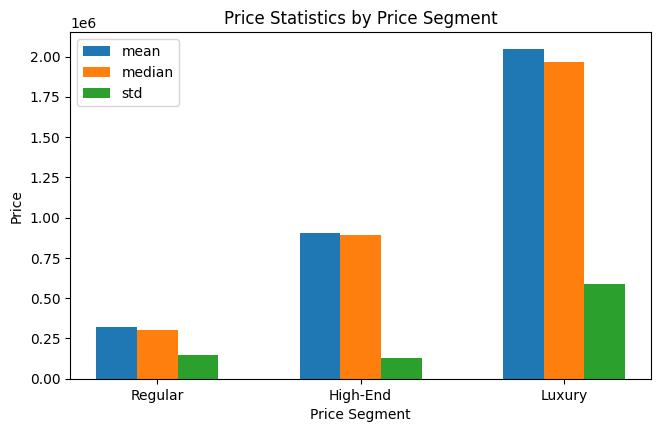

In [ ]:
# Comparing the column labelled "Price" over the column labelled "Region"

price_segment_stats = df_cleaned_housing_data.groupby('Price_Segment')['Price'].agg(['mean', 'median', 'std'])

# Transposing the DataFrame
price_segment_stats_transposed = price_segment_stats.loc[['Regular', 'High-End', 'Luxury']].T # Transpose the DataFrame using .T

# Displaying the results
print(price_segment_stats_transposed)

# Plotting a bar chart of price_segment_stats

plt.figure(figsize=(7.5, 4.5))

# Defining the x-axis positions for each group
x_pos = [i for i in range(len(price_segment_stats_transposed.columns))]

# Defining the bar width
bar_width = 0.2 # Added this line to define bar_width

# Ploting the bars for each statistic
for i, stat in enumerate(['mean', 'median', 'std']):
  plt.bar([pos + i * bar_width for pos in x_pos],
          price_segment_stats_transposed.loc[stat], # Access rows using .loc[stat]
          width=bar_width,
          label=stat)

plt.xticks([pos + bar_width for pos in x_pos], price_segment_stats_transposed.columns)
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.title("Price Statistics by Price Segment")
plt.legend()
plt.show()

Findings:
- Luxury Properties have the highest mean, median, and standard deviation.
- Regular Properties have the lowest mean, median, and standard deviation.

Price_Segment        Regular       High-End        Luxury
mean           320200.376782  903410.384615  2.048644e+06
median         299972.500000  895000.000000  1.965250e+06
std            145516.523623  125831.403893  5.910254e+05


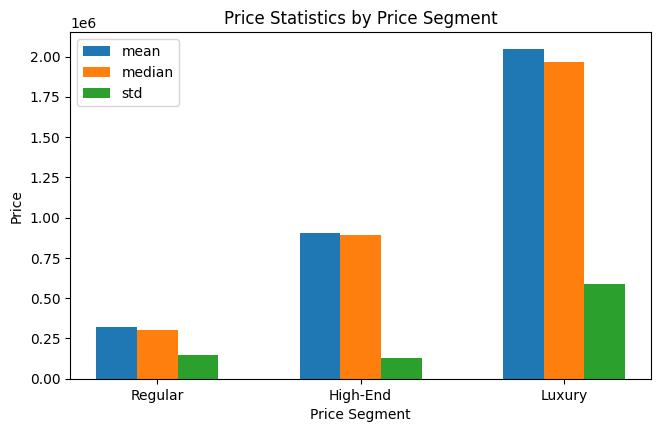

In [ ]:
# Comparing the column labelled "Price" over the column labelled "Price Segment"

price_segment_stats = df_cleaned_housing_data.groupby('Price_Segment')['Price'].agg(['mean', 'median', 'std'])

# Transposing the DataFrame
# Use .T to transpose the DataFrame
price_segment_stats_transposed = price_segment_stats.loc[['Regular', 'High-End', 'Luxury']].T

# Displaying the results
print(price_segment_stats_transposed)

# Plotting a bar chart of price_segment_stats

plt.figure(figsize=(7.5, 4.5))

# Defining the x-axis positions for each group
x_pos = [i for i in range(len(price_segment_stats_transposed.columns))]

# Defining the bar width
bar_width = 0.2 # Added this line to define bar_width

# Ploting the bars for each statistic
for i, stat in enumerate(['mean', 'median', 'std']):
  plt.bar([pos + i * bar_width for pos in x_pos],
          price_segment_stats_transposed.loc[stat],
          width=bar_width,
          label=stat)

plt.xticks([pos + bar_width for pos in x_pos], price_segment_stats_transposed.columns)
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.title("Price Statistics by Price Segment")
plt.legend()
plt.show()

<ipython-input-36-5e158ce6c1ab>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property_type_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Property Type'])['Property Type'].value_counts().unstack()


Property Type    D    F    S    T
Price_Segment                    
Regular        307  172  304  199
High-End        12   19    5    3
Luxury           6    9    3    0


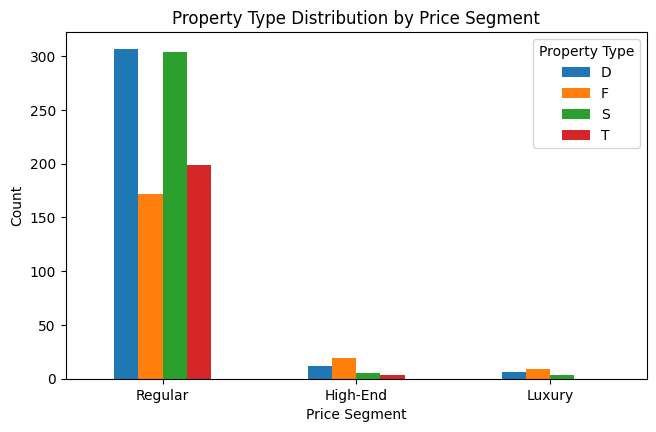

In [ ]:
# Displaying the counts of values in the column labelled "Property Type" grouped by the values in the column "Price_Segment"

property_type_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Property Type'])['Property Type'].value_counts().unstack()

# Transposing the DataFrame
property_type_by_segment_transposed = property_type_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(property_type_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "Property Type" grouped by the values in the column "Price_Segment"

property_type_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Property Type Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

- Findings: The majority of the transactions are Regular Properties.

New Build? (Y/N)    N    Y
Price_Segment             
Regular           603  379
High-End           25   14
Luxury              9    9


<ipython-input-37-5190e1b6f20b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_build_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'New Build? (Y/N)'])['New Build? (Y/N)'].value_counts().unstack()


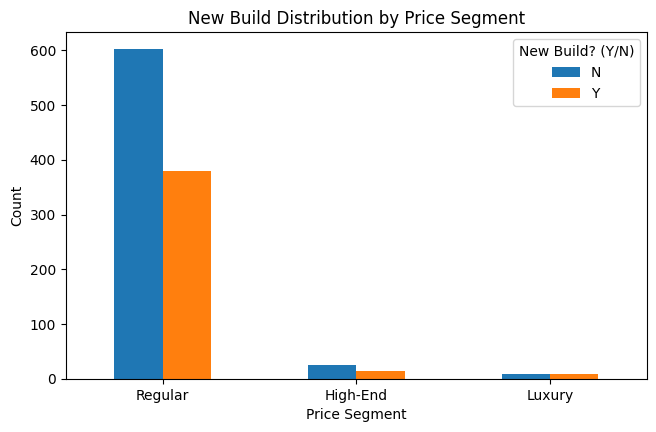

In [ ]:
# Displaying the counts of values in the column labelled "New Build? (Y/N)" grouped by the values in the column "Price_Segment"

new_build_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'New Build? (Y/N)'])['New Build? (Y/N)'].value_counts().unstack()

# Transposing the dataframe
new_build_by_segment_transposed = new_build_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(new_build_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "New Build? (Y/N)" grouped by the values in the column "Price_Segment"

new_build_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('New Build Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='New Build? (Y/N)')
plt.show()


Findings: The majority of New Builds are Regular Properties.

<ipython-input-38-b9dc8af73725>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Duration'])['Duration'].value_counts().unstack()


Duration         F    L
Price_Segment          
Regular        771  211
High-End        20   19
Luxury           9    9


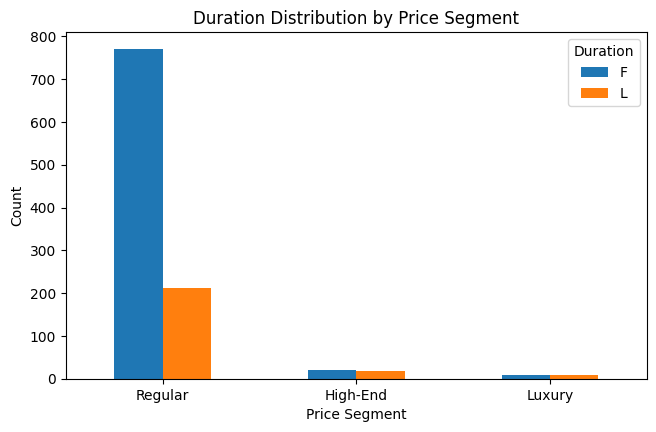

In [ ]:
# Displaying the counts of values in the column labelled "Duration" grouped by the values in the column "Price_Segment"

duration_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Duration'])['Duration'].value_counts().unstack()

# Transposing the DataFrame
duration_by_segment_transposed = duration_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(duration_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "Duration" grouped by the values in the column "Price_Segment"

duration_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Duration Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='Duration')
plt.show()


Findings: The majority of transactions are Regular Freehold Properties.

7.2. Price Segments and Location

<ipython-input-39-02b0f3f87d20>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Region'])['Region'].value_counts().unstack()


Region         East Midlands  East of England  Greater London  North East  \
Price_Segment                                                               
Regular                  128              108              87         115   
High-End                   1                2              20           1   
Luxury                     1                1              10           0   

Region         North West  South East  South West  Wales  West Midlands  
Price_Segment                                                            
Regular               152         148          87     42            115  
High-End                0          12           3      0              0  
Luxury                  0           5           1      0              0  


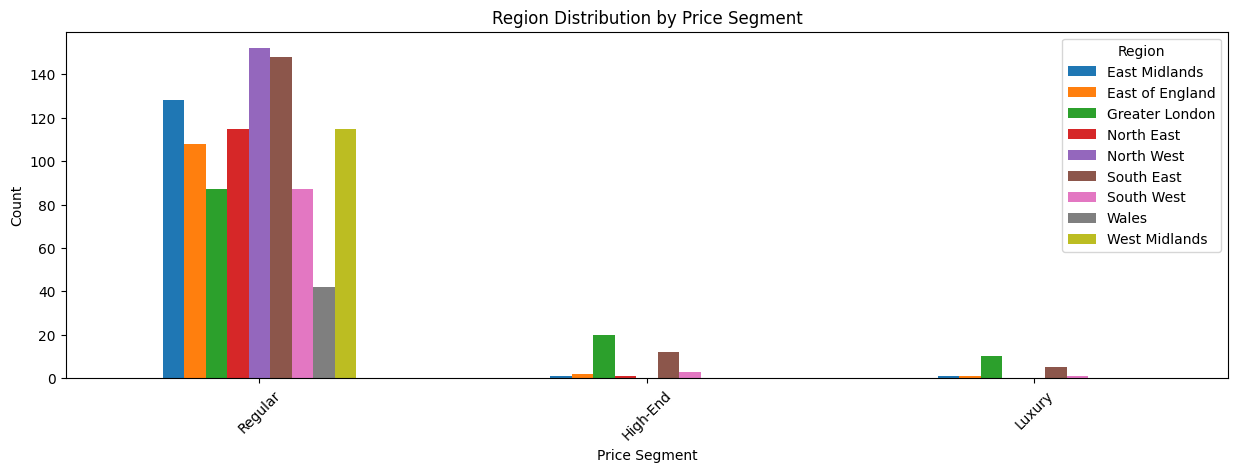

In [ ]:
# Displaying the counts of values in the column labelled "Region" grouped by the values in the column "Price_Segment"

region_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Region'])['Region'].value_counts().unstack()

# Transposing the DataFrame
region_by_segment_transposed = region_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(region_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "Region" grouped by the values in the column "Price_Segment"

region_by_segment_transposed.plot(kind='bar', figsize=(15, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Region Distribution by Price Segment')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


**8. Deeper Insights & Interpretation**

8.1. High-End and Luxury Properties: Investigating Price Segments

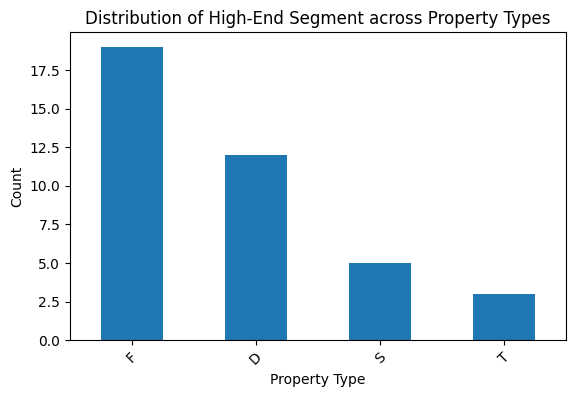

In [ ]:
# Plotting the distribution of the column labelled "Property Types" where the values are "High-End" across the column labelled "Property Types"

# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each property type within the 'High-End' segment
property_type_counts = high_end_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Property Types')
plt.xticks(rotation=45)
plt.show()


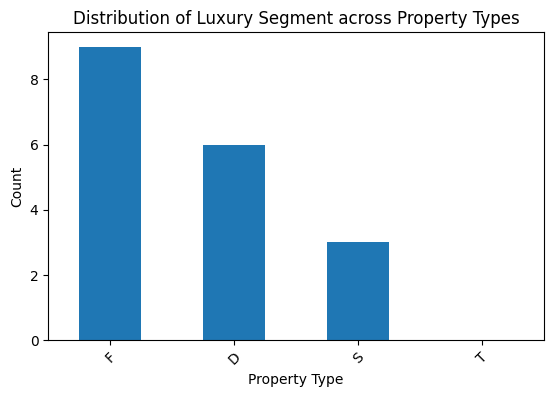

In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "Luxury" across the column labelled "Property Types"

# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each property type within the 'Luxury' segment
property_type_counts = luxury_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Property Types')
plt.xticks(rotation=45)
plt.show()


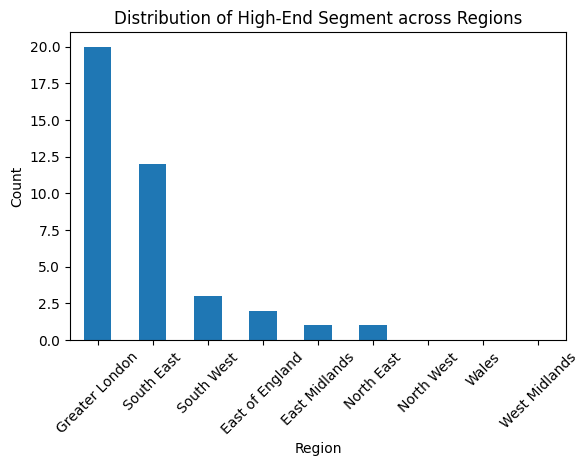

In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "High-End" across the column labelled "Region"

# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each region within the 'High-End' segment
region_counts = high_end_properties['Region'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Regions')
plt.xticks(rotation=45)
plt.show()

Findings:
- There are a greater number of High-End property transactions in Greater London and in the South of England.
- There are a lesser number of High-End property transactions in the Midlands and in Wales.

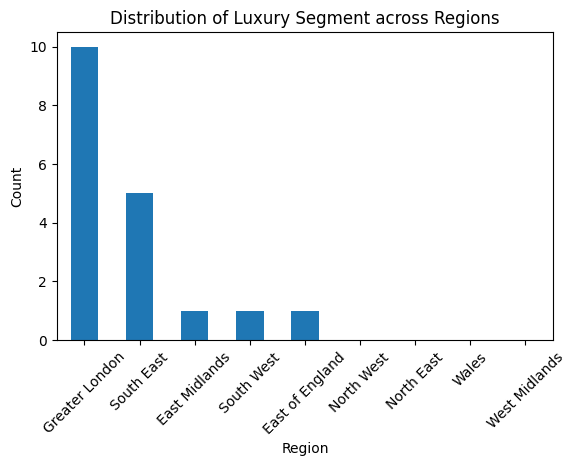

In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "Luxury" across the column labelled "Region"

# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each region within the 'Luxury' segment
region_counts = luxury_properties['Region'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Regions')
plt.xticks(rotation=45)
plt.show()


Findings:
- There are a greater number of Luxury property transactions in Greater London and in the South of England.
- There are a lesser number of Luxury property transactions in the Midlands and in Wales.

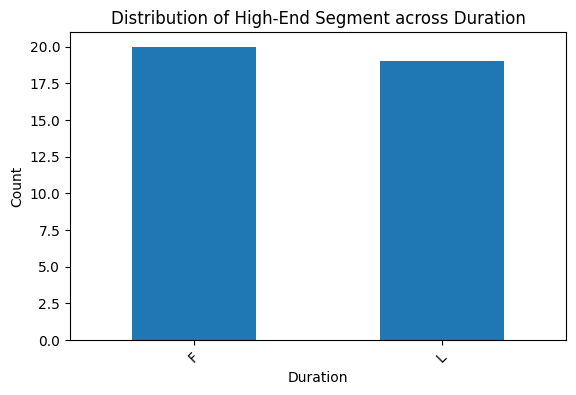

In [ ]:
# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each duration within the 'High-End' segment
duration_counts = high_end_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: The majority of High-End property transactions are Freeholds.

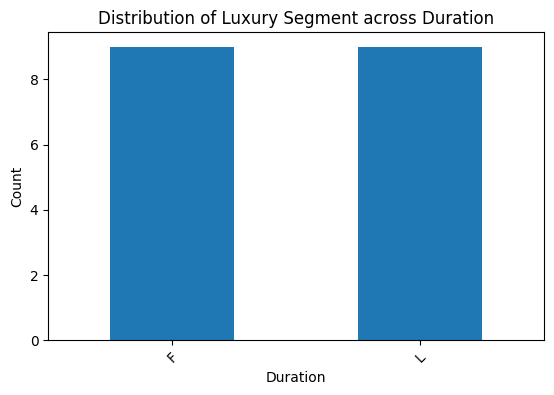

In [ ]:
# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each duration within the 'Luxury' segment
duration_counts = luxury_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: The majority of Luxury property transactions are Freeholds.

<ipython-input-46-0eb326166930>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()


Property Type    D   F  S  T
Region                      
East Midlands    1   0  0  0
East of England  1   0  0  1
Greater London   3  13  3  1
North East       0   1  0  0
North West       0   0  0  0
South East       6   4  1  1
South West       1   1  1  0
Wales            0   0  0  0
West Midlands    0   0  0  0


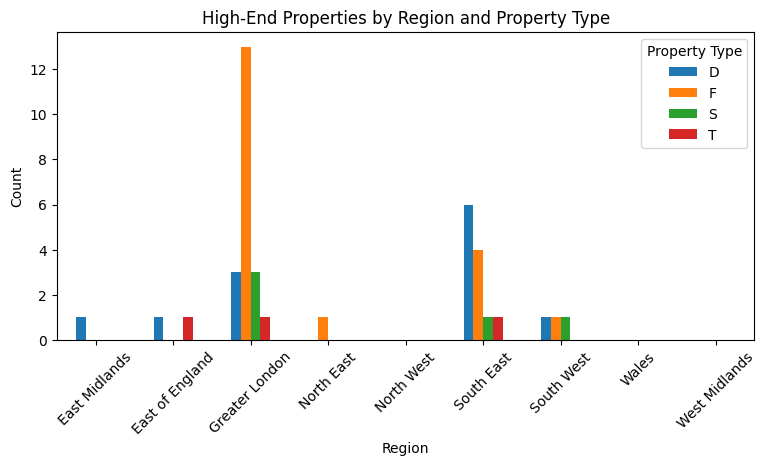

In [ ]:
# Displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Property Type"

# Grouping the data by 'Region' and 'Property Type' and counting the occurrences of 'High-End' in 'Price_Segment'
high_end_by_region_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'High-End'
].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()

print(high_end_by_region_property_type)

# Plotting a bar chart displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Property Type"

high_end_by_region_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('High-End Properties by Region and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-47-4372268d1d77>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()


Property Type    D  F  S  T
Region                     
East Midlands    1  0  0  0
East of England  1  0  0  0
Greater London   1  8  1  0
North East       0  0  0  0
North West       0  0  0  0
South East       2  1  2  0
South West       1  0  0  0
Wales            0  0  0  0
West Midlands    0  0  0  0


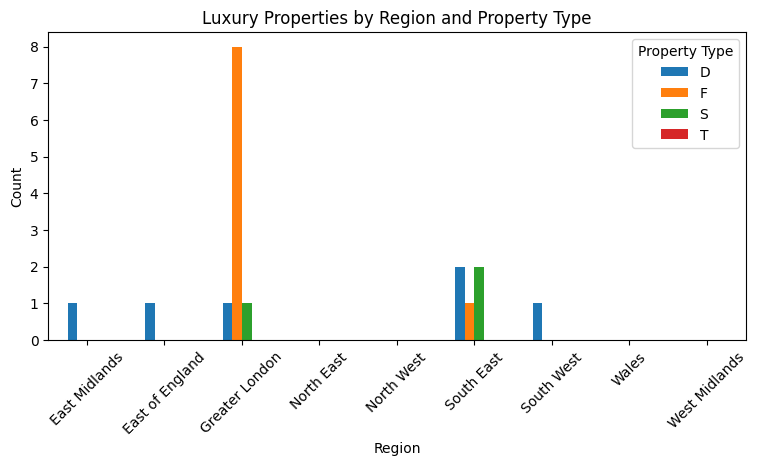

In [ ]:
# Displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Property Type"

import matplotlib.pyplot as plt
# Grouping the data by 'Region' and 'Property Type' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_region_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()

print(luxury_by_region_property_type)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Property Type"
luxury_by_region_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Luxury Properties by Region and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


Duration         F   L
Region                
East Midlands    1   0
East of England  2   0
Greater London   7  13
North East       0   1
North West       0   0
South East       8   4
South West       2   1
Wales            0   0
West Midlands    0   0


<ipython-input-48-33079db5622d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Duration'])['Price_Segment'].count().unstack()


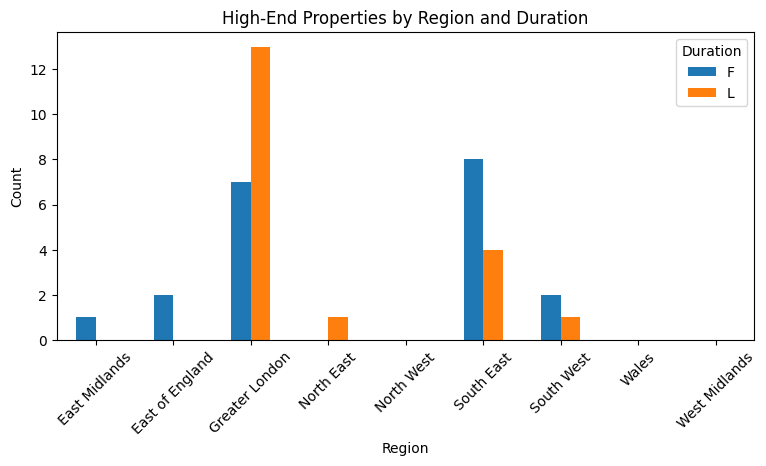

In [ ]:
# Displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Duration"

# Grouping the data by 'Region' and 'Duration' and counting the occurrences of 'High-End' in 'Price_Segment'
high_end_by_region_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'High-End'
].groupby(['Region', 'Duration'])['Price_Segment'].count().unstack()

print(high_end_by_region_duration)

# Plotting a bar chart displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Duration"

high_end_by_region_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('High-End Properties by Region and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()


<ipython-input-49-e8144447e977>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()


Property Type    D  F  S  T
Region                     
East Midlands    1  0  0  0
East of England  1  0  0  0
Greater London   1  8  1  0
North East       0  0  0  0
North West       0  0  0  0
South East       2  1  2  0
South West       1  0  0  0
Wales            0  0  0  0
West Midlands    0  0  0  0


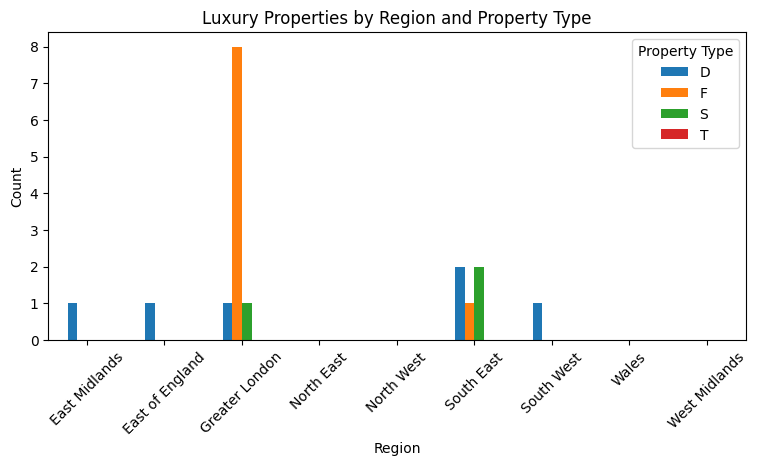

In [ ]:
# Grouping the data by 'Region' and 'Property Type' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_region_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['Region', 'Property Type'])['Price_Segment'].count().unstack()

print(luxury_by_region_property_type)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Property Type"
luxury_by_region_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Luxury Properties by Region and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-50-9288cc29b372>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Duration'])['Price_Segment'].count().unstack()


Duration         F  L
Region               
East Midlands    1  0
East of England  1  0
Greater London   2  8
North East       0  0
North West       0  0
South East       4  1
South West       1  0
Wales            0  0
West Midlands    0  0


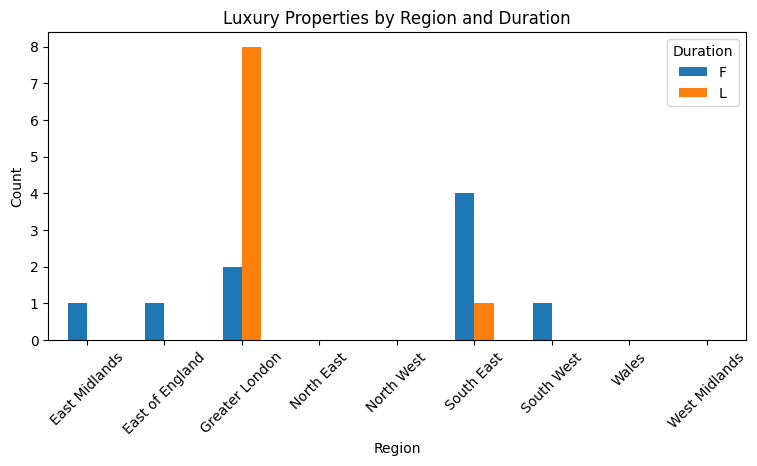

In [ ]:
# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Duration"

# Grouping the data by 'Region' and 'Duration' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_region_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['Region', 'Duration'])['Price_Segment'].count().unstack()

print(luxury_by_region_duration)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "Region" and "Duration"

luxury_by_region_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Luxury Properties by Region and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()



8.2. New Builds vs. Resales

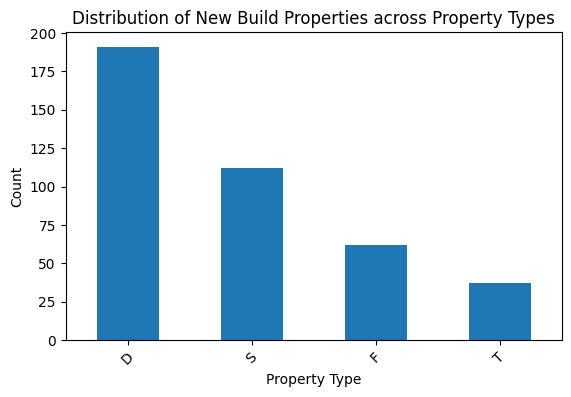

In [ ]:
# Plotting the distribution of the column labelled "New Build? (Y/N)" where the values are "Y" across the column labelled "Property Types"

import matplotlib.pyplot as plt
# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each property type within the 'New Build' segment
property_type_counts = new_build_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Property Types')
plt.xticks(rotation=45)
plt.show()

Findings:
- There are a greater number of New Build Property Transactions for Detatched Properties.
- There are a lesser number of New Build Property Transactions for Terraced Properties.

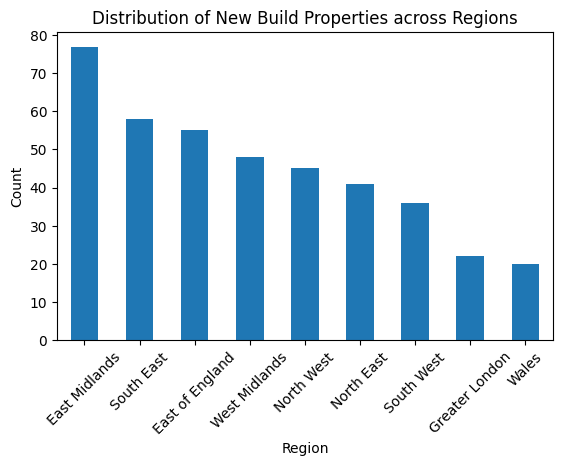

In [ ]:
# Plotting the distribution of the column labelled "New Build? (Y/N)" where the values are "Y" across the column labelled "Regions"

# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each region within the 'New Build' segment
region_counts = new_build_properties['Region'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Regions')
plt.xticks(rotation=45)
plt.show()


Findings: There are a greater number of New Build property transactions in the West of England.

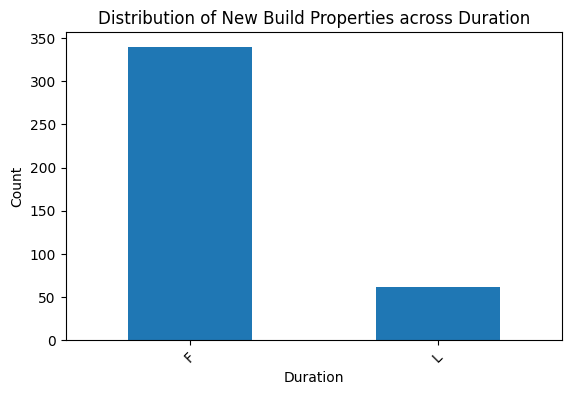

In [ ]:
# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each duration within the 'New Build' segment
duration_counts = new_build_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: There are a greater number of New Build property transactions for Freehold properties.

<ipython-input-54-dd5479ca36b0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Property Type'])['New Build? (Y/N)'].count().unstack()


Property Type     D   F   S  T
Region                        
East Midlands    55   4  12  6
East of England  31   3  16  5
Greater London    0  22   0  0
North East       14   4  19  4
North West       22   7  14  2
South East       26   9  18  5
South West       13   7  12  4
Wales             9   0   4  7
West Midlands    21   6  17  4


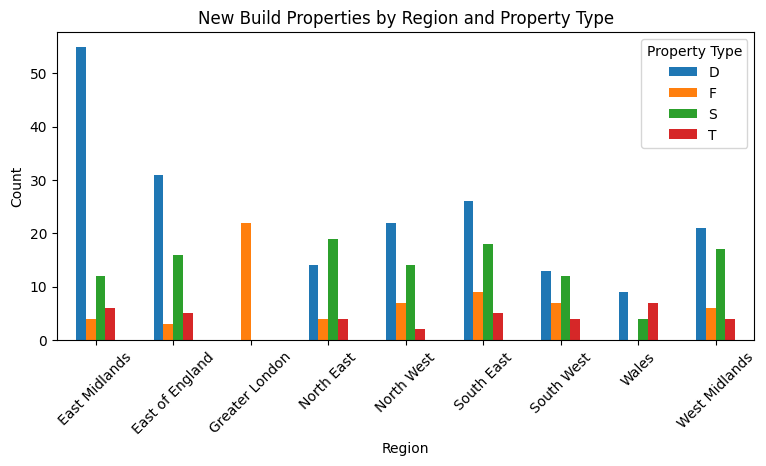

In [ ]:
# Displaying the counts of the column labelled "New Build? (Y/N)" where the values are "Y" grouped by the values in the columns labelled "Region" and "Property Type"

# Grouping the data by 'Region' and 'Property Type' and counting the occurrences of 'Y' in 'New Build? (Y/N)'
new_build_by_region_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['New Build? (Y/N)'] == 'Y'
].groupby(['Region', 'Property Type'])['New Build? (Y/N)'].count().unstack()

print(new_build_by_region_property_type)

# Plotting a bar chart displaying the counts of values "Y" in the column labelled "New Build? (Y/N)" grouped by the values in the columns labelled "Region" and "Property Type"
new_build_by_region_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('New Build Properties by Region and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-55-086406419119>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['Region', 'Duration'])['New Build? (Y/N)'].count().unstack()


Duration          F   L
Region                 
East Midlands    73   4
East of England  52   3
Greater London    0  22
North East       37   4
North West       38   7
South East       49   9
South West       29   7
Wales            20   0
West Midlands    42   6


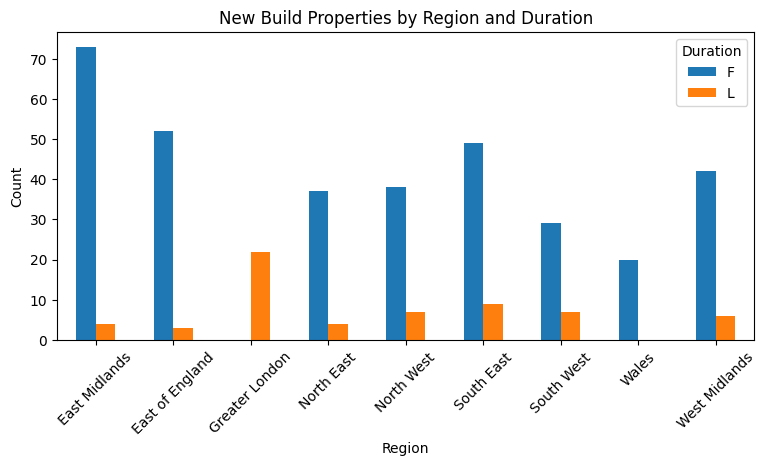

In [ ]:
# Displaying the counts of the column labelled "New Build? (Y/N)" where the values are "Y" grouped by the values in the columns labelled "Region" and "Duration"

# Grouping the data by 'Region' and 'Duration' and counting the occurrences of 'Y' in 'New Build? (Y/N)'
new_build_by_region_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['New Build? (Y/N)'] == 'Y'
].groupby(['Region', 'Duration'])['New Build? (Y/N)'].count().unstack()

print(new_build_by_region_duration)

# Plotting a bar chart displaying the counts of values "Y" in the column labelled "New Build? (Y/N)" grouped by the values in the columns labelled "Region" and "Duration"
new_build_by_region_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('New Build Properties by Region and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()


**9. Summary of Insights**

*3. Univariate Analysis*

  _3.1. Price_

  - Findings:

    - The Skewness of Price is 4.87, indicating that the distribution of prices is highly skewed to the right. Hence, there are many lower-priced observations, but a few extreme, high-priced observations pulling the distribution to the right. This right skew suggests that there are some very high outliers in the dataset.

    - The Kurtosis of Price is 43.16, indicating that the distribution of prices has very heavy tails, meaning there are many outliers (particularly extreme values far from the mean). Hence, the price distribution has more extreme deviations than a normal distribution.

    - Overall Conclusion: The data shows that prices are highly skewed to the right, with a lot of outliers or extreme values. This might suggest that a small number of high-priced items are significantly affecting the distribution, making it non-normal.


  _3.2. Categorical Columns_

  - Findings: "Terraced" and "Semi-Detatched" make up the majority of the transactions, whilst "Flats" are the property type which have the least transactions.

  - Findings: The majority of the transactions are not New Build properties.

  - Findings: The majority of the transactions are "Freehold" properties.

  - Findings: The majority of the transactions are from the "Regular" Price Segment.

*4. Bivariate Analysis*


  _4.2. Price vs. Location_

  - Findings: The mean average price is generally greater in Greater London and in the South of England. The mean average price is generally lesser in the North of England and in Wales.

  _4.3. Price Over Time_

  - Findings: There is no noticeable trends in the change of the mean average property price over time.

*5. Multivariate Analysis*

  _5.2. Correlation Matrix_

  - Findings:
    - There is notable correlation between Price and; Detatched Properties, the Greater London Region.

    - There is notable correlation between Freehold Properties and; Detatched Properties, Semi-Detatched Properties and Terraced Properties.

    - There is notable correlation between Leasehold Properties and Flats.

    - There is notable correlation between London and; Leasehold Properties and Flats.

*6. Hypothesis Testing*

  _6.1. ANOVA: Price Differences by Property Type_

  - R-squared (0.081): The model explains 8.1% of the variability in Price. Hence, "Property Type" alone isn’t explaining much of the variation in prices.

  - F-statistic (133.8): The p-value for this F-stat is 4.54e-83, which is practically 0. Hence, the difference in price across the property types is statistically significant.

  - Coefficients:
  
    - Intercept (5.006e+05): This is the base price (around £500,600) when the property type is the reference category, "Detatched" properties.
    - Property Type [T.F] (-2.032e+05): Flats are, on average, about £203,200 cheaper than the base property.
    - Property Type [T.S] (-1.866e+05): Semi-Detatched properties are about £186,600 cheaper than the base property.

**10. Prepare for Modeling**

In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)


Transaction Unique ID                               object
Price                                                int64
Date of Transfer                            datetime64[ns]
Post Code                                           object
Property Type                                     category
New Build? (Y/N)                                  category
Duration                                          category
Primary Addressable Object Name (PAON)              object
Secondary Addressable Object Name (SAON)            object
Town/City                                           object
District                                            object
County                                              object
Price_Segment                                       object
latitude                                            object
longitude                                           object
Post Code Area                                      object
Region                                            catego

In [ ]:
# Dropping the columns which are irrelevant for modelling:

df_cleaned_housing_data = df_cleaned_housing_data.drop(columns=['Transaction Unique ID', 'Date of Transfer', 'Post Code', 'Primary Addressable Object Name (PAON)', 'Secondary Addressable Object Name (SAON)', 'Town/City', 'District', 'County', 'latitude', 'longitude', 'Post Code Area'])

In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)

Price                  int64
Property Type       category
New Build? (Y/N)    category
Duration            category
Price_Segment         object
Region              category
dtype: object


In [ ]:
# Create dummy variables for categorical columns

df_cleaned_housing_data = pd.get_dummies(df_cleaned_housing_data,
                                         columns=['Property Type', 'New Build? (Y/N)', 'Duration', 'Price_Segment','Region'],
                                         drop_first=True)


In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)

Price                     int64
Property Type_F            bool
Property Type_S            bool
Property Type_T            bool
New Build? (Y/N)_Y         bool
Duration_L                 bool
Price_Segment_Luxury       bool
Price_Segment_Regular      bool
Region_East of England     bool
Region_Greater London      bool
Region_North East          bool
Region_North West          bool
Region_South East          bool
Region_South West          bool
Region_Wales               bool
Region_West Midlands       bool
dtype: object


**11. Exporting Dataset for Modelling**

In [ ]:
# Exporting the dataset as a .csv file

df_cleaned_housing_data.to_csv('/content/drive/MyDrive/Housing Prices Project/May 2024/model_housing_data_may_2024.csv', index=False)


In [ ]:
# Exporting the dataset as a pickle file

df_cleaned_housing_data.to_pickle('/content/drive/MyDrive/Housing Prices Project/May 2024/model_housing_data_may_2024.pkl')
